#TUGAS PEMROGRAMAN 2
#PENGANTAR KECERDASAN BUATAN
###ALMANIK BALINGGA - 1301184253 - IF4210

####Mount File GDrive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd "/gdrive/My Drive/Tugas/AI_TUPRO/"

Mounted at /gdrive
/gdrive/My Drive/Tugas/AI_TUPRO


####Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

####Membaca File 

In [3]:
#Kenalan dulu sama datanya
df = pd.read_excel('Mahasiswa.xls')
df

,Id,Penghasilan,Pengeluaran
0,1,18.76,9.68
1,2,8.35,4.52
2,3,17.03,10.11
3,4,8.23,9.25
4,5,16.89,6.99
...,...,...,...
95,96,17.31,10.00
96,97,18.85,9.78
97,98,14.52,10.32
98,99,9.83,10.64


In [4]:
df.describe()

,Id,Penghasilan,Pengeluaran
count,100.000000,100.000000,100.00000
mean,50.500000,13.778900,8.38130
std,29.011492,4.055465,1.89298
min,1.000000,4.620000,3.44000
25%,25.750000,9.617500,7.39250
50%,50.500000,14.805000,8.60000
75%,75.250000,17.045000,9.80750
max,100.000000,19.690000,11.29000



1.   Rata Rata Penghasilan : 13.778900	
2.   Penghasilan Terendah : 4.620000	
3.   Penghasilan Tertinggi : 19.690000	
4.   Rata Rata Pengeluaran : 8.38130	
5.   Pengeluaran Terendah : 3.44000	
6.   Pengeluaran Tertinggi : 11.29000	



####Inisiasi Nama Linguistik 

Pengeluaran dan Penghasilan keduanya akan dibagi menjadi 5 Nama Linguistik :


1.   Sangat Tinggi (ST)
2.   Tinggi (T)
3.   Sedang (S)
4.   Rendah (R)
5.   Sangat Rendah (SR)

<br/>
Mengapa demikian?
<br>Karena rentang nilai maksimum penghasilan dan pengeluaran berbeda, tetapi yang dibicarakan masih sama (uang). Sehingga penentuan variable linguistik pada penghasilan akan mempengaruhi variable linguistik pada pengeluaran. Maka, akan lebih logis dan memudahkan jika kategorinya dipecah menjadi agak lebih banyak.




###FUZZYFIKASI

####Fungsi Keanggotaan Penghasilan

In [5]:
def fkpenghasilan(x):
  SR,R,S,T,ST = 0,0,0,0,0
  if x>=0 and x <=4:
    SR,R,S,T,ST = 1,0,0,0,0
    return  SR,R,S,T,ST
  if x>4 and x<=5:
    SR,R,S,T,ST = (-x+5),(x-4),0,0,0
    return  SR,R,S,T,ST
  if x>5 and x<=7:
    SR,R,S,T,ST = 0,1,0,0,0
    return  SR,R,S,T,ST
  if x>7 and x<=8:
    SR,R,S,T,ST = 0,(-x+8),(x-7),0,0
    return  SR,R,S,T,ST
  if x>8 and  x<= 9:
    SR,R,S,T,ST = 0,0,1,0,0
    return  SR,R,S,T,ST
  if x>9 and x <= 11:
    SR,R,S,T,ST = 0,0,((-x+11)/2),((x-9)/2),0
    return  SR,R,S,T,ST
  if x>11 and x<=14:
    SR,R,S,T,ST = 0,0,0,1,0
    return  SR,R,S,T,ST
  if x>14 and x<=15:
    SR,R,S,T,ST = 0,0,0,(-x+15),(x-14)
    return  SR,R,S,T,ST
  if x>15:
    SR,R,S,T,ST = 0,0,0,0,1
    return  SR,R,S,T,ST


####Fungsi Keanggotaan Pengeluaran

In [7]:
def fkpengeluaran(x):
  SR,R,S,T,ST = 0,0,0,0,0
  if x>=0 and x <=3:
     SR,R,S,T,ST = 1,0,0,0,0
     return  SR,R,S,T,ST
  if x>3 and x<=4:
     SR,R,S,T,ST = (-x+4),(x-3),0,0,0
     return  SR,R,S,T,ST
  if x>4 and x<=5:
    SR,R,S,T,ST = 0,1,0,0,0
    return  SR,R,S,T,ST
  if x>5 and x<=6:
    SR,R,S,T,ST = 0,(-x+6),(x-5),0,0
    return  SR,R,S,T,ST
  if x>6 and  x<= 7:
    SR,R,S,T,ST = 0,0,1,0,0
    return  SR,R,S,T,ST
  if x>7 and x <= 8:
    SR,R,S,T,ST = 0,0,(-x+8),(x-7),0
    return  SR,R,S,T,ST
  if x>8 and x<=9:
    SR,R,S,T,ST = 0,0,0,1,0
    return  SR,R,S,T,ST
  if x>9 and x<=10:
    SR,R,S,T,ST = 0,0,0,(-x+10),(x-9)
    return  SR,R,S,T,ST
  if x>10:
    SR,R,S,T,ST = 0,0,0,0,1
    return  SR,R,S,T,ST

####Fuzzy Set

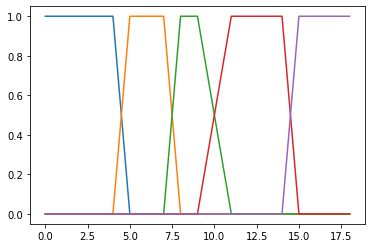

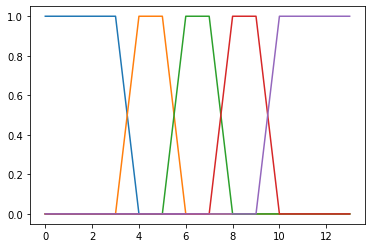

In [8]:
aa = []
for i in range(int(max(list(df['Penghasilan'])))):
  aa.append(fkpenghasilan(i))
plt.plot(aa)
plt.show()

aa = []
for i in range(int(max(list(df['Pengeluaran'])))+3):
  aa.append(fkpengeluaran(i))

plt.plot(aa)
plt.show()

###INFERENSI

####Aturan Inferensi

In [4]:
infe = pd.DataFrame([
                  ('Sangat', 'Sangat', 'Sangat','Sangat','Sangat'),
                  ('Sangat', 'Sangat', 'Sangat','Sangat','Sangat'),
                  ('Kurang', 'Kurang', 'Kurang','Sangat','Sangat'),
                  ('Kurang', 'Kurang', 'Kurang','Kurang','Kurang'),
                  ('Kurang', 'Kurang', 'Kurang','Kurang','Kurang')],
                  index=['Penghasilan SR', 'Penghasilan R', 'Penghasilan S', 'Penghasilan T', 'Penghasilan ST'],
                  columns=('Pengeluaran SR', 'Pengeluaran R', 'Pengeluaran S','Pengeluaran T','Pengeluaran ST'))
infe

,Pengeluaran SR,Pengeluaran R,Pengeluaran S,Pengeluaran T,Pengeluaran ST
Penghasilan SR,Sangat,Sangat,Sangat,Sangat,Sangat
Penghasilan R,Sangat,Sangat,Sangat,Sangat,Sangat
Penghasilan S,Kurang,Kurang,Kurang,Sangat,Sangat
Penghasilan T,Kurang,Kurang,Kurang,Kurang,Kurang
Penghasilan ST,Kurang,Kurang,Kurang,Kurang,Kurang


####Fungsi Inferensi Kelayakan

In [10]:
def inferensi(x,y):
  sangat,kurang = [],[]
  sangat.append(min(x[0],y[0]))
  sangat.append(min(x[0],y[1]))
  sangat.append(min(x[0],y[2]))
  sangat.append(min(x[0],y[3]))
  sangat.append(min(x[0],y[4]))
  sangat.append(min(x[1],y[0]))
  sangat.append(min(x[1],y[1]))
  sangat.append(min(x[1],y[2]))
  sangat.append(min(x[1],y[3]))
  sangat.append(min(x[1],y[4]))
  sangat.append(min(x[2],y[4]))
  kurang.append(min(x[2],y[0]))
  kurang.append(min(x[2],y[1]))
  kurang.append(min(x[2],y[2]))
  sangat.append(min(x[2],y[3]))
  kurang.append(min(x[3],y[0]))
  kurang.append(min(x[3],y[1]))
  kurang.append(min(x[3],y[2]))
  kurang.append(min(x[3],y[3]))
  kurang.append(min(x[3],y[4]))
  kurang.append(min(x[4],y[0]))
  kurang.append(min(x[4],y[1]))
  kurang.append(min(x[4],y[2]))
  kurang.append(min(x[4],y[3]))
  kurang.append(min(x[4],y[4]))
  sangatTerpilih = max(sangat)
  kurangTerpilih = max(kurang)
  return sangatTerpilih,kurangTerpilih

####Fungsi Keanggotaan Kelayakan Penerima


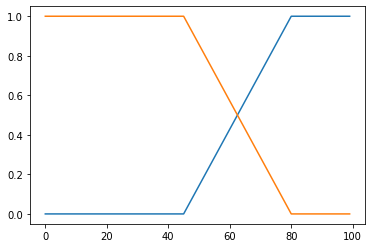

In [11]:
def kelayakan(x):
  L,T = 0,0
  if x<= 45:
    L = 0
    T = 1
    return L,T
  if x>45 and x<=80:
    L= ((x-45)/35)
    T= ((-x+80)/35)
    return L,T
  if x>80:
    L=1
    T=0 
    return L,T
yy=[]
for i in range(100):
  yy.append(kelayakan(i))
plt.plot(yy)
plt.show()

###DEFUZZYFIKASI

####Defuzzyfikasi Model Mamdani <br>
Kira kira akan seperti ini : <br>
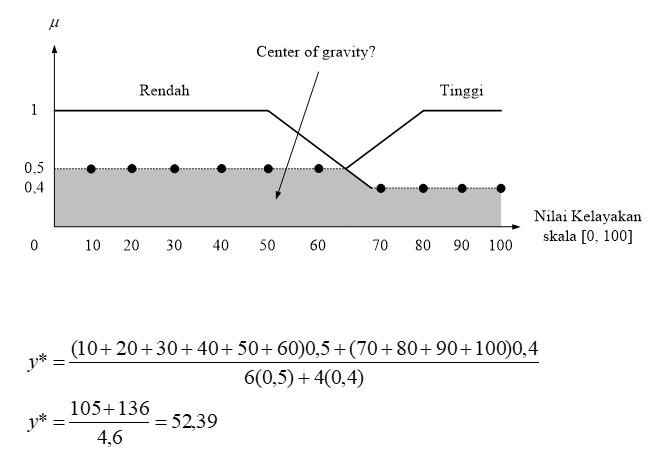

In [12]:
def mamdani(x):
  #jika KURANG LAYAK only
  #kondisi ini akan diambil jika pada Inferensi menghasilkan keluaran Sangat layak = 0, Kurang layak = y
  if x[0] == 0:
    #membangkitkan angka random untuk dijadikan Weighted Average
    m = list(set(list(np.random.randint(0,79,10))))
    #print(m)
    sum = 0
    pembagi = 0
    #melakukan penghitungan weighted average
    for i in range(len(m)):
      #jika di wilayah atap trapesium, maka akan langsung dikalikan dengan nilai atap/atap clipping, kemudian dijumlahkan
      if m[i] <=50:
        sum = sum+(m[i]*x[1])
        pembagi = pembagi+x[1]
      #jika di wilayah sisi miring trapesium maka akan dihitung terlebih dahulu nilainya,
      # kemudian akan disesuaikan dengan nilai clipping
      if m[i]>50 and m[i]<=80:
        if (kelayakan(m[i])[1]<=x[1]):
          sum = sum + (m[i]*kelayakan(m[i])[1])
          pembagi = pembagi+kelayakan(m[i])[1]
        else :
          sum = sum+(m[i]*x[1])
          pembagi = pembagi + x[1]
  #jika SANGAT LAYAK only
  #kondisi ini akan diambil jika pada Inferensi menghasilkan keluaran Sangat layak = x, Kurang layak = 0
  if x[1] == 0:
    #membangkitkan angka random untuk dijadikan Weighted Average
    m = list(set(list(np.random.randint(50,100,10))))
    #print(m)
    sum = 0
    pembagi = 0
    #melakukan penghitungan weighted average
    for i in range(len(m)):
      #jika di wilayah atap trapesium, maka akan langsung dikalikan dengan nilai atap/atap clipping, kemudian dijumlahkan
      if m[i] >80:
        sum = sum+(m[i]*x[0])
        pembagi = pembagi+x[0]
      #jika di wilayah sisi miring trapesium maka akan dihitung terlebih dahulu nilainya,
      # kemudian akan disesuaikan dengan nilai clipping
      if m[i]>50 and m[i]<=80:
        if (kelayakan(m[i])[0]<=x[0]):
          sum = sum + (m[i]*kelayakan(m[i])[0])
          pembagi = pembagi+kelayakan(m[i])[0]
        else :
          sum = sum+(m[i]*x[0])
          pembagi = pembagi + x[0]
  #jika PERPADUAN SANGAT DAN KURANG LAYAK
  #kondisi ini akan diambil jika pada Inferensi menghasilkan keluaran Sangat layak = x, Kurang layak = y 
  if 0 not in x:
    #membangkitkan angka random untuk dijadikan Weighted Average
    m = list(set(list(np.random.randint(0,50,10)))) + list(set(list(np.random.randint(81,100,5))))
    #print(m)
    sum = 0
    pembagi = 0
    #melakukan penghitungan weighted average
    for i in range(len(m)):
      if m[i] <=50:
        sum = sum+(m[i]*x[1])
        pembagi = pembagi+x[1]
      if m[i] >80:
        sum = sum+(m[i]*x[0])
        pembagi = pembagi+x[0]

  return sum/pembagi


###PROGRAM UTAMA

In [27]:
#Model Mamdani
fuz =[]
a = list(df['Penghasilan'])
b = list(df['Pengeluaran'])
c = list(df['Id'])
for i in range(len(list(df['Penghasilan']))):
  #Fuzzyfikasi lalu Inferensi
  d = inferensi(fkpenghasilan(a[i]),fkpengeluaran(b[i]))
  #Defuzzyfikasi
  fuz.append([mamdani(d),c[i]])

print('mamdani : ',fuz)
congrats = sorted(fuz,key=lambda x: x[0],reverse=True)
print('sorted mamdani : ', congrats)
for i in range(20):
  print(congrats[i])

mamdani :  [[35.73695420660277, 1], [40.68771929824562, 2], [30.35984848484848, 3], [78.74201474201475, 4], [25.918287937743187, 5], [37.96124031007753, 6], [85.41211225997053, 7], [27.22222222222222, 8], [38.33576642335766, 9], [17.444444444444446, 10], [79.34016393442622, 11], [29.142517186673707, 12], [78.21632653061225, 13], [33.40316205533597, 14], [32.93529411764707, 15], [35.00904977375566, 16], [28.440871369294605, 17], [26.852492370295014, 18], [33.26984126984128, 19], [30.539033457249072, 20], [26.494761350407444, 21], [24.944899478778854, 22], [37.26905574516496, 23], [32.743362831858406, 24], [76.2952029520295, 25], [31.2, 26], [32.2814474439977, 27], [41.599999999999994, 28], [31.759124087591243, 29], [23.048245614035086, 30], [23.452171272395987, 31], [40.58088235294118, 32], [78.71808510638299, 33], [36.71031746031746, 34], [44.89685688129386, 35], [34.3360655737705, 36], [38.245040840140035, 37], [55.867003367003385, 38], [30.57971014492754, 39], [29.001352569882787, 40

###OUTPUT FILE


In [30]:
dataOut = []
for i in range(20):
  dataOut.append(congrats[i][1])
dataOut.sort()
datadict = {
    'Id' : dataOut
}
dataexcel = pd.DataFrame(datadict)
dataexcel.to_excel("Bantuan.xls", index=None)

In [31]:
out = pd.read_excel("Bantuan.xls")
out

,Id
0,4
1,7
2,11
3,13
4,25
5,33
6,38
7,41
8,46
9,47
